In [1]:
(ql:quickload "kenzo")
(in-package :cat)

To load "kenzo":
  Load 1 ASDF system:
    kenzo
; Loading "kenzo"



#<PACKAGE "CAT-7">

# The Eilenberg-Zilber module

The functions of this module are related to the chain complex of the product of two simplicial sets. They implement the Eilenberg-Mac Lane morphism (function `eml`) and the Alexander-Whitney morphism  (function `aw`).

`eml` *ssx ssy* *\[Function\]*
> build the Eilenberg-Mac Lane homomorphism $\cal EML$, also called the *shuffle homomorphism*. (**Marvin Greenberg**, *Lectures on Algebraic Topology*, W.A. Benjamin Inc, 1967.) The arguments *ssx* and *ssy* represent some simplicial sets $X$ and $Y$. The homomorphism 
$${\cal EML}:{\cal C}_*(X) \otimes {\cal C}_*(Y) \longrightarrow {\cal C}_*(X \times Y)$$
is defined by:
$${\cal EML}(\alpha \otimes \beta)= 
 \sum{{\varepsilon(\varpi)}(\eta_{j_q}\ldots \eta_{j_1}\alpha,\, \eta_{i_p}\ldots \eta_{i_1}\beta)},$$
where $X\times Y$ is the simplicial cartesian product of the two simplicial sets $X$ and $Y$,  $\alpha$ (resp. $\beta$) is a geometric simplex of $X$ (resp. $Y$), $\eta_k$ is the $k^{th}$ degeneracy operator, the sum is over all permutations $\varpi = (i_1, \ldots, i_p, j_1, \ldots, j_q)$ of $(0, \ldots, p+q-1)$ such that $$ i_1 < i_2 < \cdots < i_p,\quad j_1 < j_2 < \cdots < j_q, \quad p+q=n$$
and $\varepsilon(\varpi)$ is the signature of the corresponding permutation. The sum at the right hand part determines a decomposition of the geometric product $\alpha \times \beta$ into a combination of generators of the simplicial cartesian product (see the simplicial sets chapter). The combination takes in account the orientation of every simplex. These generators are non-degenerate simplices of the cartesian product but their projections are in general degenerate simplices of $X$ and $Y$ (see the examples).
 
`aw` *ssx ssy* *\[Function\]*
> build the Alexander-Whitney chain homomorphism. The arguments *ssx* and *ssy* represent some simplicial sets $X$ and $Y$. The homomorphism 
$${\cal AW}:{\cal C}_*(X \times Y) \longrightarrow {\cal C}_*(X) \otimes {\cal C}_*(Y)$$
is defined by the following rule: let $\sigma$ be an $n$-simplex and let us define
two operators, $\lambda_p$ and $\rho_q$:
$$\lambda_p: {\cal C}_n(X) \longrightarrow {\cal C}_{n-p}(X),\quad (n \geq p),$$
$$\rho_q: {\cal C}_n(Y) \longrightarrow {\cal C}_{n-q}(X),\quad (n \geq q),$$
respectively by
$$\lambda_p(\sigma)=\partial_{p+1}\ldots \partial_n \sigma$$
and
$$\rho_q(\sigma)=\partial_0\ldots\partial_{n-1} \sigma.$$
Now, for the generator $(\alpha,\beta)$  of degree $n$ in ${\cal C}_*(X \times Y)$, the Alexander-Whitney morphism is defined  by:
$${\cal AW}(\alpha, \beta)=\sum_{p=0}^n{\lambda_p(\alpha) \otimes \rho_{n-p}(\beta)}.$$
This sum can be interpreted as a decomposition, up to a homotopy, of the simplex $\alpha \times \beta$
($\alpha$ **and** $\beta$ can be degenerate even if $\alpha \times \beta$ is not) in terms of (tensor) products of non-degenerate simplices.

`phi` *ssx ssy* *\[Function\]*
> build the homotopy chain morphism 
$$\Phi: {\cal C}_*(X \times Y) \longrightarrow {\cal C}_*(X \times Y)$$
satisfying the formula
$$d \circ \Phi + \Phi \circ d = Id - {\cal EML} \circ {\cal AW}.$$

`ez` *ssx ssy* *\[Function\]*
> build the Eilenberg--Zilber reduction as shown by the following diagram, where $X={\mathit ssx}$ 
and $Y={\mathit ssy}$.
$$
\begin{aligned}
{{\cal C}_*(X \times Y)}\quad & \quad \stackrel{\Phi}{\longrightarrow} & {}^s{{\cal C}_*(X \times Y)} \cr
 {\scriptstyle {\cal AW}} \downarrow \uparrow {\scriptstyle {\cal EML}}  & & \cr
 {{\cal C}_*(X) \otimes {\cal C}_*(Y)} & &\cr
\end{aligned}
$$

## Examples

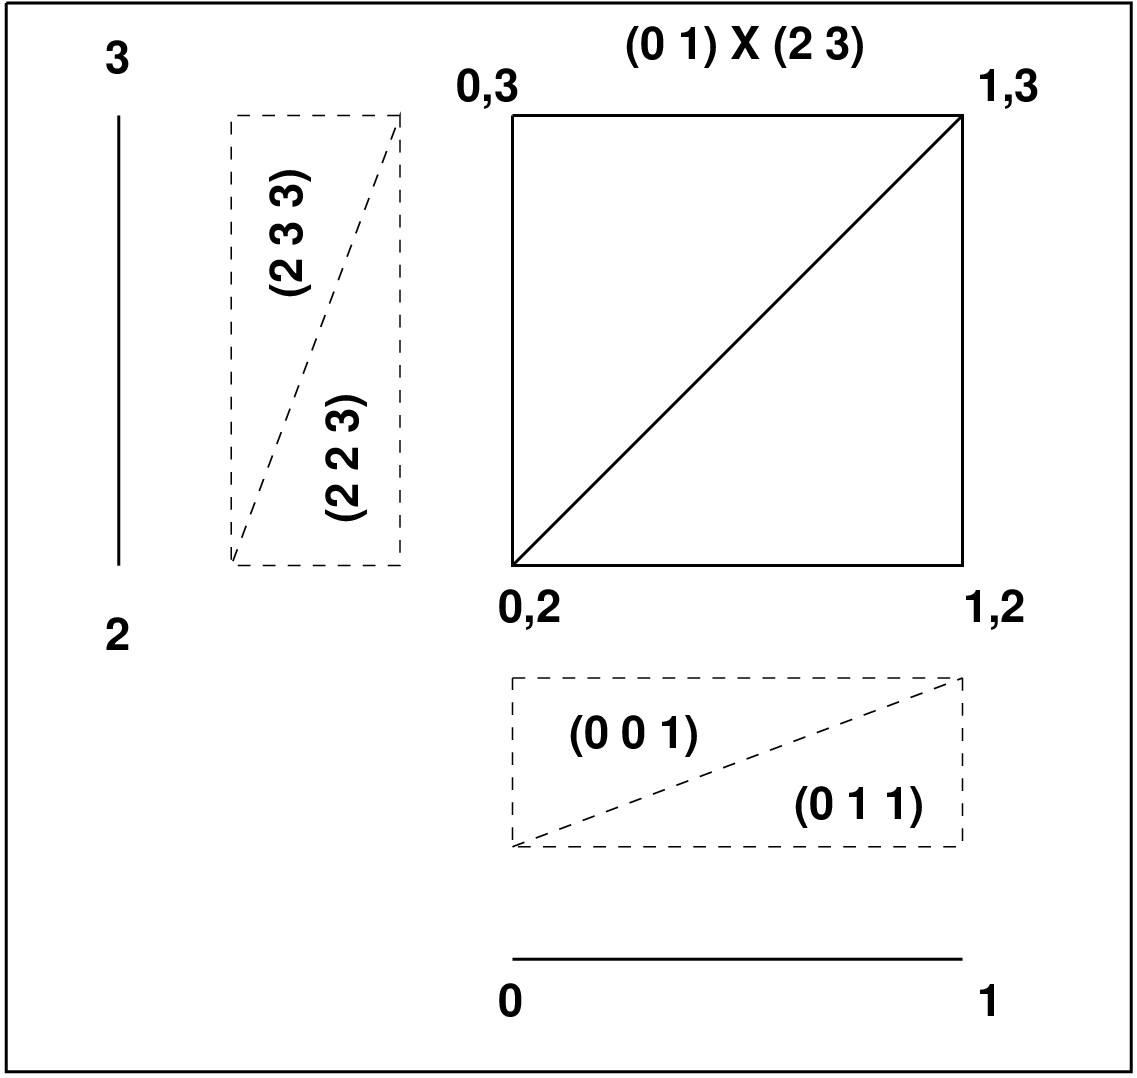

In [2]:
(cl-jupyter-user:png-from-file "eml1.png")

As simplicial sets $X$ and $Y$, let us use two copies of $\Delta^\mathbb{N}$, that we may build by the lisp statement `(soft-delta-infinity)` (Though we repeat this statement in the following line, there will be only a simplicial set created). We have chosen the *soft* version, to inspect  the results more easily.

In [3]:
(def eml-mrp (eml (soft-delta-infinity)(soft-delta-infinity)))

[K11 Morphism (degree 0): K3 -> K6]

Let us apply the Eilenberg-Mac Lane homomorphism to the tensor product $(0\, 1)\otimes (2\, 3)$:

In [4]:
(? eml-mrp 2 (tnpr 1 (d(dlop-ext-int '(0 1)))
                   1 (d(dlop-ext-int '(2 3)))))


----------------------------------------------------------------------{CMBN 2}
<-1 * <CrPr 0 (DELT . 3) 1 (DELT . 12)>>
<1 * <CrPr 1 (DELT . 3) 0 (DELT . 12)>>
------------------------------------------------------------------------------


The decomposition is illustrated by the previous geometric diagram, where for instance a degenerate simplex like $\eta_1(0\, 1)$ is noted $(0\, 1\, 1)$.

For the tensor product $(0\,1\,2)\otimes (3\,4)$, an intuitive description is still possible, as shown in the following diagram, but not in higher dimensions.

As the input of simplices is sometimes cumbersome, we have defined a macro called `code` to facilitate the input of the simplices.

In [5]:
(defmacro code (arg) `(d (dlop-ext-int ,arg)))

CODE

In [6]:
(? eml-mrp 3 (tnpr 2 (code '(0 1 2)) 1 (code '(3 4)) ))


----------------------------------------------------------------------{CMBN 3}
<1 * <CrPr 0 (DELT . 7) 2-1 (DELT . 24)>>
<-1 * <CrPr 1 (DELT . 7) 2-0 (DELT . 24)>>
<1 * <CrPr 2 (DELT . 7) 1-0 (DELT . 24)>>
------------------------------------------------------------------------------


In [7]:
(? eml-mrp 6 (tnpr 2 (code '(0 3 5)) 4 (code '(0 1 2 4 5)) ))


----------------------------------------------------------------------{CMBN 6}
<1 * <CrPr 3-2-1-0 (DELT . 41) 5-4 (DELT . 55)>>
<-1 * <CrPr 4-2-1-0 (DELT . 41) 5-3 (DELT . 55)>>
<1 * <CrPr 4-3-1-0 (DELT . 41) 5-2 (DELT . 55)>>
<-1 * <CrPr 4-3-2-0 (DELT . 41) 5-1 (DELT . 55)>>
<1 * <CrPr 4-3-2-1 (DELT . 41) 5-0 (DELT . 55)>>
<1 * <CrPr 5-2-1-0 (DELT . 41) 4-3 (DELT . 55)>>
<-1 * <CrPr 5-3-1-0 (DELT . 41) 4-2 (DELT . 55)>>
<1 * <CrPr 5-3-2-0 (DELT . 41) 4-1 (DELT . 55)>>
<-1 * <CrPr 5-3-2-1 (DELT . 41) 4-0 (DELT . 55)>>
<1 * <CrPr 5-4-1-0 (DELT . 41) 3-2 (DELT . 55)>>
... ...
------------------------------------------------------------------------------


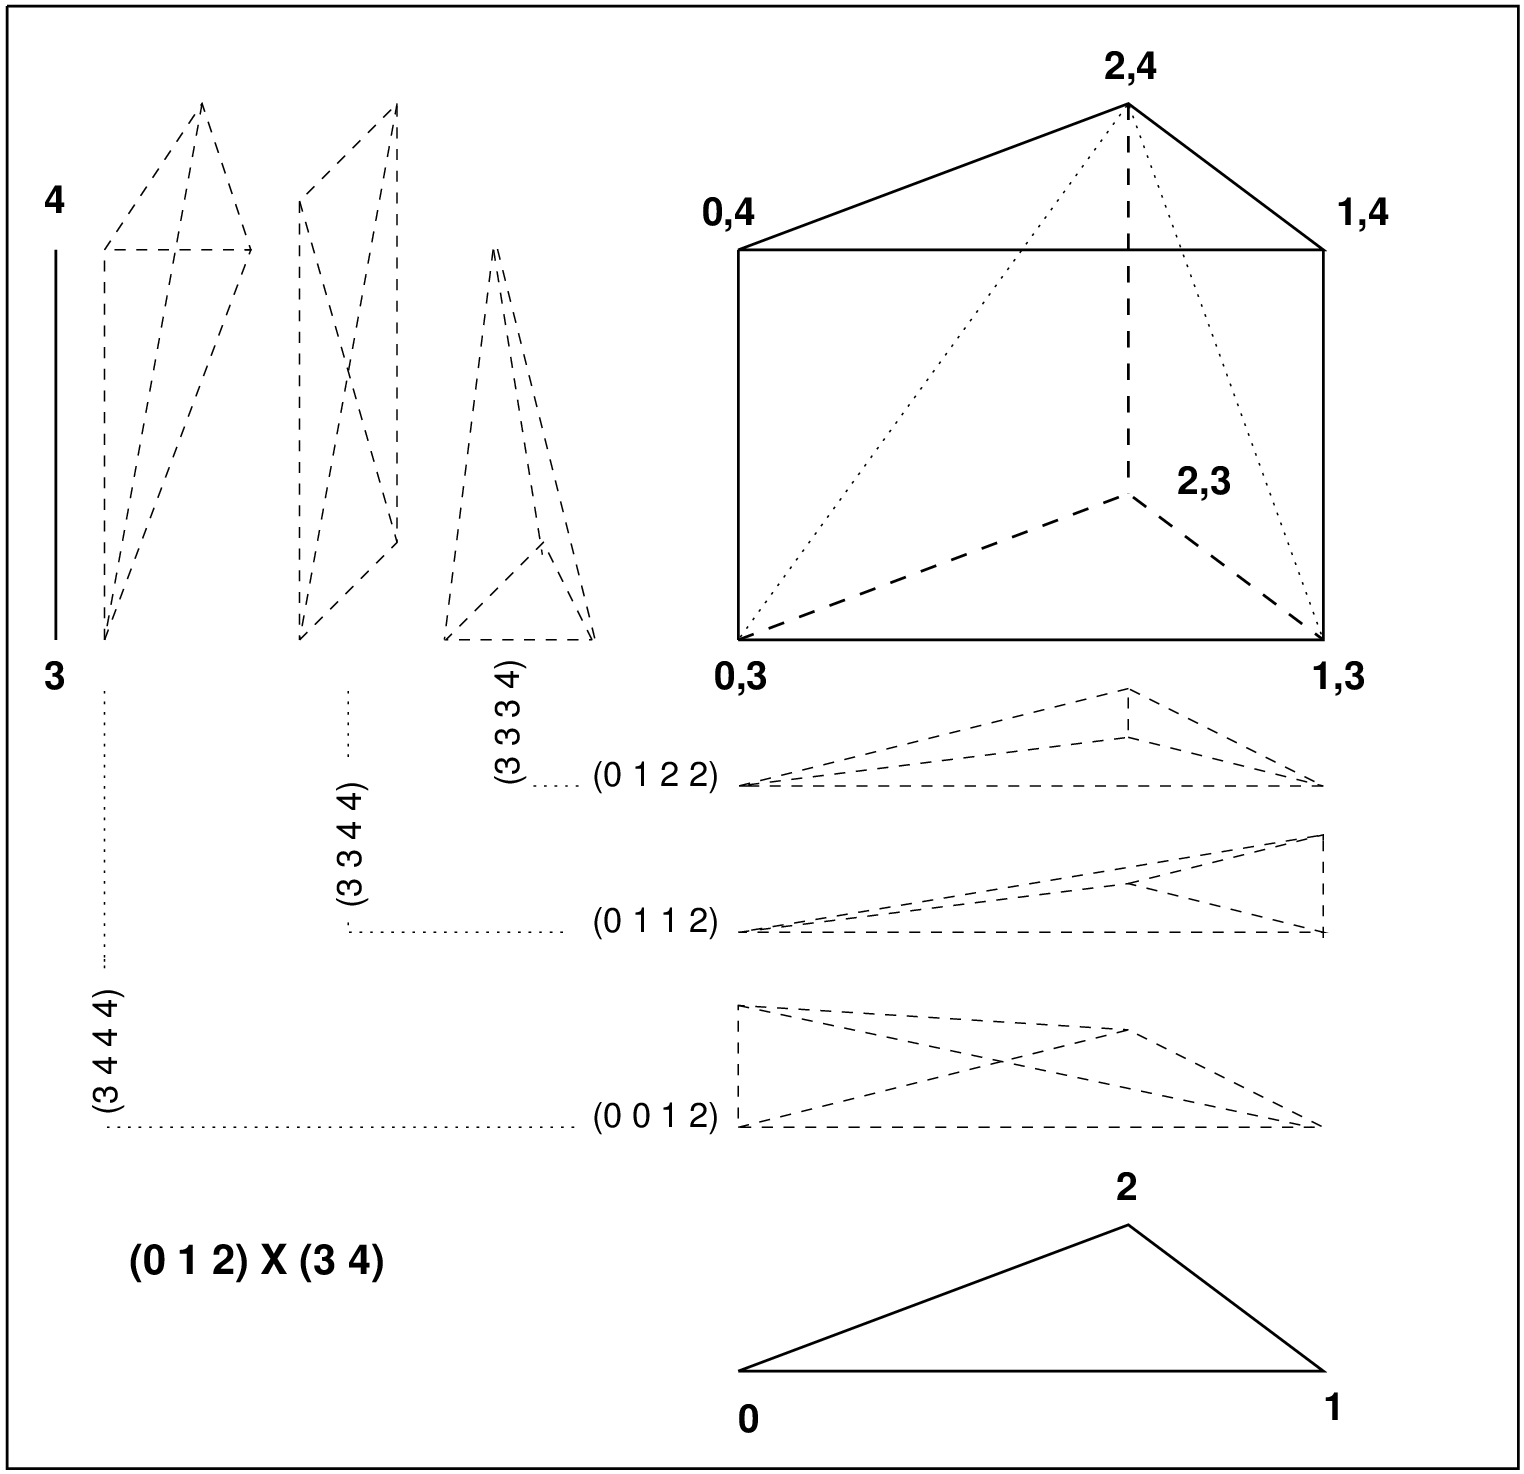

In [8]:
(cl-jupyter-user:png-from-file "eml2.png")

The Alexander-Whitney homomorphism works in the reverse sense:

In [9]:
(def aw-mrp (aw (soft-delta-infinity)(soft-delta-infinity)))

[K12 Morphism (degree 0): K6 -> K3]

The 2-simplices of the cartesian product $(0\, 1\, 2) \times (3\, 4)$ are (here, the degeneracy operators are in clear):

```
      <CrPr 0 (0 1) 1 (3 4)>
      <CrPr 1 (0 1) 0 (3 4)>
      <CrPr 0 (0 2) 1 (3 4)>
      <CrPr 1 (0 2) 0 (3 4)>
      <CrPr 0 (1 2) 1 (3 4)>
      <CrPr 1 (1 2) 0 (3 4)>
      <CrPr * (0 1 2) 1-0 (3)>
      <CrPr * (0 1 2) 1-0 (4)>
 -->  <CrPr * (0 1 2) 0 (3 4)>
      <CrPr * (0 1 2) 1 (3 4)>
```

The last but one line of this list describes the triangle shown in dashed lines in the prism in the previous picture, joining the points $(0,3), (1,3), (2,4)$. Let us apply  the homomorphism $\cal AW$:

In [10]:
(? aw-mrp 2 (crpr 0 (code '(0 1 2)) 1 (code '(3 4)) ))


----------------------------------------------------------------------{CMBN 2}
<1 * <TnPr (DELT . 3) (DELT . 24)>>
<1 * <TnPr (DELT . 7) (DELT . 16)>>
------------------------------------------------------------------------------


We see that we obtain  a kind of decomposition, up to a homotopy, of this triangle in terms of the two tensor products $(0\, 1\, 2) \otimes (4)$ (the "upper" triangle of the prism) and $(0\,1) \otimes (3\, 4)$ (the "front" rectangle of the prism).

The composition ${\cal AW} \circ {\cal EML}$ is the identity in the tensor product of the two chain complexes.

In [11]:
(def g (tnpr 2 (code '(0 1 2)) 3 (code '(2 3 4 5)) ))

<TnPr (DELT . 7) (DELT . 60)>

In [12]:
(? eml-mrp 5 g)


----------------------------------------------------------------------{CMBN 5}
<1 * <CrPr 2-1-0 (DELT . 7) 4-3 (DELT . 60)>>
<-1 * <CrPr 3-1-0 (DELT . 7) 4-2 (DELT . 60)>>
<1 * <CrPr 3-2-0 (DELT . 7) 4-1 (DELT . 60)>>
<-1 * <CrPr 3-2-1 (DELT . 7) 4-0 (DELT . 60)>>
<1 * <CrPr 4-1-0 (DELT . 7) 3-2 (DELT . 60)>>
<-1 * <CrPr 4-2-0 (DELT . 7) 3-1 (DELT . 60)>>
<1 * <CrPr 4-2-1 (DELT . 7) 3-0 (DELT . 60)>>
<1 * <CrPr 4-3-0 (DELT . 7) 2-1 (DELT . 60)>>
<-1 * <CrPr 4-3-1 (DELT . 7) 2-0 (DELT . 60)>>
<1 * <CrPr 4-3-2 (DELT . 7) 1-0 (DELT . 60)>>
------------------------------------------------------------------------------


In [13]:
(? aw-mrp *)


----------------------------------------------------------------------{CMBN 5}
<1 * <TnPr (DELT . 7) (DELT . 60)>>
------------------------------------------------------------------------------


In [14]:
(setf *tnpr-with-degrees* t)

T

In [15]:
**


----------------------------------------------------------------------{CMBN 5}
<1 * <TnPr 2 (DELT . 7) 3 (DELT . 60)>>
------------------------------------------------------------------------------


But the composition ${\cal EML} \circ {\cal AW}$ is by no means the identity. This composition
is related to the identity via the homotopy morphism $\Phi$. Let us consider the two following simple simplicial sets `delta-0-1` and `delta-2-3`, where the second is the simplicial set, model of the segment $[2,\,3]$. To build `delta-2-3`, we have just changed the basis function, the base point and the comment in the system function `soft-delta`.

In [16]:
(def delta-0-1 (soft-delta 1))

[K13 Simplicial-Set]

In [17]:
(def delta-2-3 (build-smst 
                  :cmpr #'soft-delta-cmpr
                  :basis #'(lambda(dmn) 
                             (case dmn
                                  (0 (list (d 4)(d 8)))
                                  (1 (list(d 12)))))   
                  :bspn (d 4)
                  :face #'soft-delta-face
                  :intr-dgnl #'soft-delta-dgnl :dgnl-strt :gnrt
                  :intr-bndr #'soft-delta-bndr :bndr-strt :gnrt
                  :orgn '(my-soft-delta-2-3)))

[K18 Simplicial-Set]

In [18]:
(show-structure delta-0-1 1)



Dimension = 0:

        Vertices :  ((DELT . 1) (DELT . 2))

Dimension = 1:

        Simplex : (DELT . 3)

                Faces : (<AbSm - (DELT . 2)> <AbSm - (DELT . 1)>)

NIL

In [19]:
(show-structure delta-2-3 1)



Dimension = 0:

        Vertices :  ((DELT . 4) (DELT . 8))

Dimension = 1:

        Simplex : (DELT . 12)

                Faces : (<AbSm - (DELT . 8)> <AbSm - (DELT . 4)>)

NIL

Let us build the cartesian product of these two simplicial sets and let us list, in particular the 0-simplices and the 1-simplices of this new simplicial set:

In [20]:
(def carre (crts-prdc delta-0-1 delta-2-3))

[K23 Simplicial-Set]

In [21]:
(show-structure carre 2)



Dimension = 0:

        Vertices :  (<CrPr - (DELT . 1) - (DELT . 4)> <CrPr - (DELT . 1) - (DELT . 8)> <CrPr - (DELT . 2) - (DELT . 4)> <CrPr - (DELT . 2) - (DELT . 8)>)

Dimension = 1:

        Simplex : <CrPr - (DELT . 3) - (DELT . 12)>

                Faces : (<AbSm - <CrPr - (DELT . 2) - (DELT . 8)>> <AbSm - <CrPr - (DELT . 1) - (DELT . 4)>>)

        Simplex : <CrPr - (DELT . 3) 0 (DELT . 4)>

                Faces : (<AbSm - <CrPr - (DELT . 2) - (DELT . 4)>> <AbSm - <CrPr - (DELT . 1) - (DELT . 4)>>)

        Simplex : <CrPr - (DELT . 3) 0 (DELT . 8)>

                Faces : (<AbSm - <CrPr - (DELT . 2) - (DELT . 8)>> <AbSm - <CrPr - (DELT . 1) - (DELT . 8)>>)

        Simplex : <CrPr 0 (DELT . 1) - (DELT . 12)>

                Faces : (<AbSm - <CrPr - (DELT . 1) - (DELT . 8)>> <AbSm - <CrPr - (DELT . 1) - (DELT . 4)>>)

        Simplex : <CrPr 0 (DELT . 2) - (DELT . 12)>

                Faces : (<AbSm - <CrPr - (DELT . 2) - (DELT . 8)>> <AbSm - <CrPr - (DELT . 2) - (DELT . 

NIL

Let us take the first 1-simplex which corresponds to the diagonal of the square (realisation of the cartesian product) and let us build the three homomorphisms $\cal AW$, $\cal EML$ and $\Phi$:

In [22]:
(def diagonal (crpr 0 (code '(0 1)) 0 (code '(2 3))))

<CrPr - (DELT . 3) - (DELT . 12)>

In [23]:
(def aw-mrp (aw delta-0-1 delta-2-3)) 

[K30 Morphism (degree 0): K23 -> K28]

In [24]:
(def eml-mrp (eml delta-0-1 delta-2-3))

[K31 Morphism (degree 0): K28 -> K23]

In [25]:
(def phi-hmy (phi delta-0-1 delta-2-3))

[K32 Morphism (degree 1): K23 -> K23]

We see that 
$$ {\cal AW}((0\, 1), (2\, 3)) = (0\, 1)\otimes (3) + (0) \otimes (2\, 3),$$
$$ {\cal EML}((0\, 1)\otimes (3) + (0) \otimes (2\, 3))= ((0\, 1), \eta_0 (3)) 
     + (\eta_0 (0), (2\, 3))$$
and that $\Phi$ applied to the diagonal returns the 2-simplex compatible with the homotopy. 
$$\Phi((0\, 1), (2\, 3))= (\eta_1(2\, 3),\eta_0(0\, 1)).$$
This is illustrated by the following diagram (the 2-simplex is the shaded triangle).

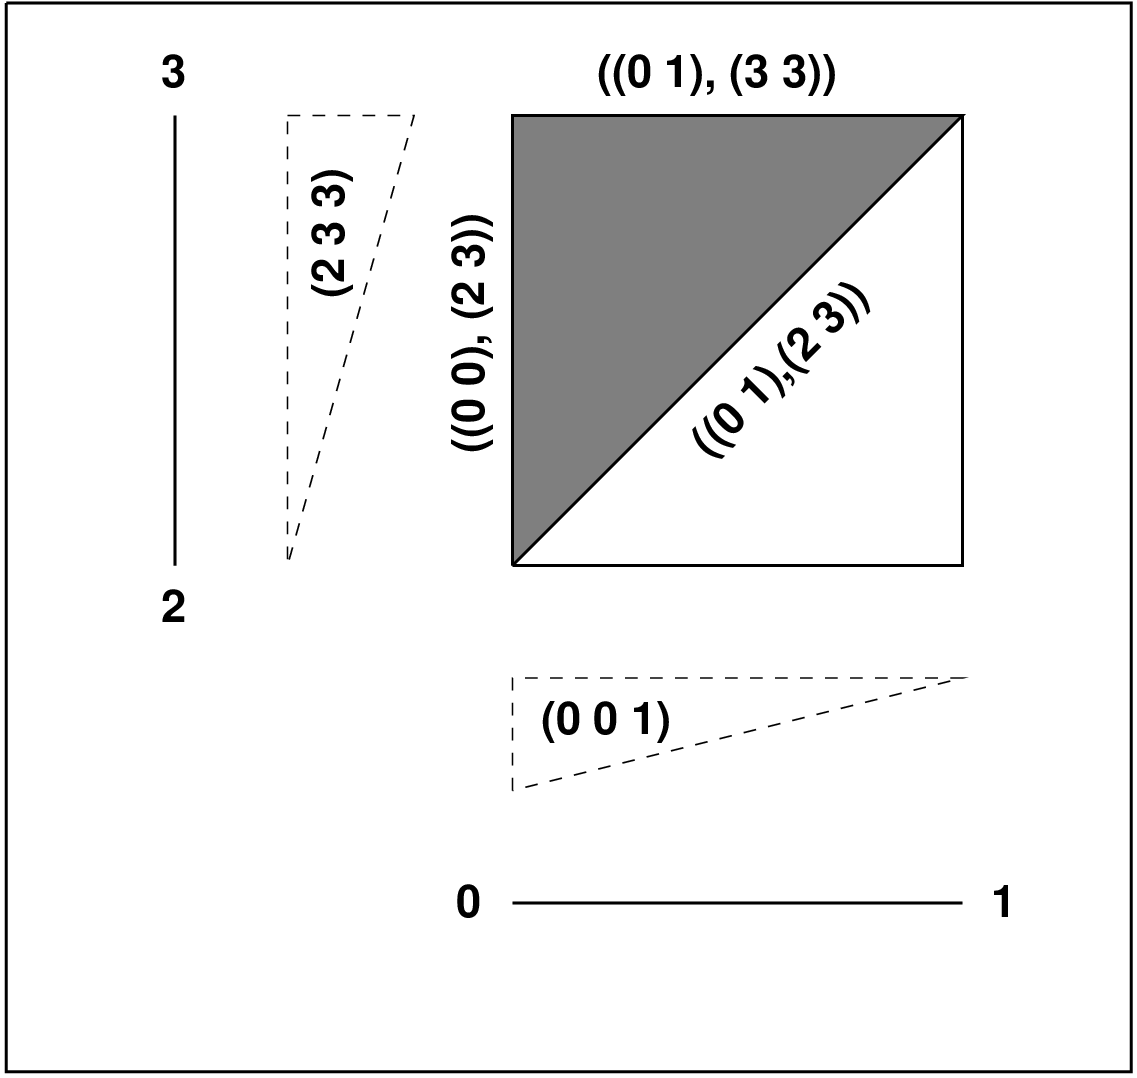

In [26]:
(cl-jupyter-user:png-from-file "eml3.png")

In [27]:
(? aw-mrp 1 diagonal)


----------------------------------------------------------------------{CMBN 1}
<1 * <TnPr 0 (DELT . 1) 1 (DELT . 12)>>
<1 * <TnPr 1 (DELT . 3) 0 (DELT . 8)>>
------------------------------------------------------------------------------


In [28]:
(? eml-mrp *)


----------------------------------------------------------------------{CMBN 1}
<1 * <CrPr - (DELT . 3) 0 (DELT . 8)>>
<1 * <CrPr 0 (DELT . 1) - (DELT . 12)>>
------------------------------------------------------------------------------


In [29]:
(? phi-hmy 1 diagonal)


----------------------------------------------------------------------{CMBN 2}
<-1 * <CrPr 0 (DELT . 3) 1 (DELT . 12)>>
------------------------------------------------------------------------------


Let us inspect now the reduction generated by the function `ez` and verify on reasonably general combinations that the involved morphisms  are coherent.

In [30]:
(def ez-rdc (ez (soft-delta-infinity) (soft-delta-infinity)))

[K34 Reduction K6 => K3]

In [31]:
(inspect *)


The object is a STANDARD-OBJECT of type REDUCTION.
0. TCC: [K6 Simplicial-Set]
1. BCC: [K3 Chain-Complex]
2. F: [K12 Morphism (degree 0): K6 -> K3]
3. G: [K11 Morphism (degree 0): K3 -> K6]
4. H: [K33 Morphism (degree 1): K6 -> K6]
5. IDNM: 34
6. ORGN: (EILENBERG-ZILBER [K1 Simplicial-Set] [K1 Simplicial-Set])
> 

NIL

With the comment slots we see that the morphism *f*, *g* and *h* are respectively *aw*, *eml* and *phi*:

In [32]:
(orgn ez-rdc)

(EILENBERG-ZILBER [K1 Simplicial-Set] [K1 Simplicial-Set])

In [33]:
(orgn (f ez-rdc))

(AW [K1 Simplicial-Set] [K1 Simplicial-Set])

In [34]:
(orgn (g ez-rdc))

(EML [K1 Simplicial-Set] [K1 Simplicial-Set])

In [35]:
(orgn (h ez-rdc))

(PHI [K1 Simplicial-Set] [K1 Simplicial-Set])

In [36]:
(setf *bc* (cmbn 3 1 (tnpr 0 (code '(0)) 3 (code '(1 2 3 4)))
                  10 (tnpr 1 (code '(5 6)) 2 (code '(7 8 9)))
                 100 (tnpr 2 (code '(10 11 12)) 1 (code '(13 14)))
                1000 (tnpr 3 (code '(15 16 17 18)) 0 (code '(19)))))


----------------------------------------------------------------------{CMBN 3}
<1 * <TnPr 0 (DELT . 1) 3 (DELT . 30)>>
<10 * <TnPr 1 (DELT . 96) 2 (DELT . 896)>>
<100 * <TnPr 2 (DELT . 7168) 1 (DELT . 24576)>>
<1000 * <TnPr 3 (DELT . 491520) 0 (DELT . 524288)>>
------------------------------------------------------------------------------


In [37]:
(setf *tc* 
     (cmbn 3 1 (crpr 0 (code '(0 1 2 3)) 0 (code '(5 6 7 8)))
            10 (crpr 0 (code '(0 1 2 3)) (dgop-ext-int '(2 0)) (code '(5 6)))
           100 (crpr (dgop-ext-int '(2 1)) (code '(0 1)) 0 (code '(5 6 7 8)))
          1000 (crpr (dgop-ext-int '(2 1)) (code '(0 1)) 1 (code '(5 6 7)))))


----------------------------------------------------------------------{CMBN 3}
<1 * <CrPr - (DELT . 15) - (DELT . 480)>>
<10 * <CrPr - (DELT . 15) 2-0 (DELT . 96)>>
<100 * <CrPr 2-1 (DELT . 3) - (DELT . 480)>>
<1000 * <CrPr 2-1 (DELT . 3) 0 (DELT . 224)>>
------------------------------------------------------------------------------


In [38]:
(pre-check-rdct ez-rdc)


---done---

NIL

In [39]:
(check-rdct-no-wait)


*TC* => 
----------------------------------------------------------------------{CMBN 3}
<1 * <CrPr - (DELT . 15) - (DELT . 480)>>
<10 * <CrPr - (DELT . 15) 2-0 (DELT . 96)>>
<100 * <CrPr 2-1 (DELT . 3) - (DELT . 480)>>
<1000 * <CrPr 2-1 (DELT . 3) 0 (DELT . 224)>>
------------------------------------------------------------------------------

*BC* => 
----------------------------------------------------------------------{CMBN 3}
<1 * <TnPr 0 (DELT . 1) 3 (DELT . 30)>>
<10 * <TnPr 1 (DELT . 96) 2 (DELT . 896)>>
<100 * <TnPr 2 (DELT . 7168) 1 (DELT . 24576)>>
<1000 * <TnPr 3 (DELT . 491520) 0 (DELT . 524288)>>
------------------------------------------------------------------------------

Checking *TDD* = 0
Result: 
----------------------------------------------------------------------{CMBN 1}
------------------------------------------------------------------------------

Checking *BDD* = 0
Result: 
----------------------------------------------------------------------{CMBN 1}
---------

NIL

## Application to Homology

Let us  illustrate the Eilenberg-Zilber theorem by the following example. Let us consider the manifold $P^2\mathbb{R}\times S^3$. The theorem says that
$$H_n({\cal C}_*(P^2\mathbb{R}\times S^3)) \cong H_n({\cal C}_*(P^2\mathbb{R}) \otimes {\cal C}_*(S^3)).$$

In [40]:
(cat-init)


---done---

NIL

In [41]:
(def p2 (moore 2 1))  ;; Moore(2,1)   generates the projectif plane.

[K1 Simplicial-Set]

In [42]:
(def s3 (sphere 3))

[K6 Simplicial-Set]

The simplicial set `p2-X-s3` is obtained from the cartesian product of the two simplicial sets `p2` and `s3`.

In [43]:
(def p2-X-s3 (crts-prdc p2 s3))

[K11 Simplicial-Set]

Now, the chain complex `p2-T-s3` is obtained from the tensor product of the two chain complexes associated to both simplicial sets `p2` and `s3` (don't forget that the class `SIMPLICIAL SET` is a subclass of the class `CHAIN COMPLEX`).

In [44]:
(def p2-T-s3 (tnsr-prdc p2 s3))

[K16 Chain-Complex]

Applying  successively the  function `chcm-homology` (which computes directly the homology groups without using a homotopy equivalence)  on these chain complexes, shows that  the homology groups are  effectively isomorphic, but the method  of the tensor  product is  much faster than the method of the simple cartesian product, the number of generators being much smaller.

In [45]:
(with-output-to-string (*trace-output*)
    (time (dotimes (i 6) (chcm-homology p2-X-s3 i))))


Computing boundary-matrix in dimension 0.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 4m 44s.
Computing the boundary of the generator 1/1 (dimension 0) :
<CrPr - * - *> 
End of computing.


Computing boundary-matrix in dimension 1.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 4m 44s.
Computing the boundary of the generator 1/1 (dimension 1) :
<CrPr - M1 0 *> 
End of computing.




Homology in dimension 0 :


Component Z


---done---
Computing boundary-matrix in dimension 1.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 4m 44s.
Computing the boundary of the generator 1/1 (dimension 1) :
<CrPr - M1 0 *> 
End of computing.


Computing boundary-matrix in dimension 2.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 4m 44s.
Computing the boundary of the generator 1/1 (dimension 2) :
<CrPr - N2 1-0 *> 
End of computing.




Homology in dimension 1 :


Component Z/2Z


---done---
Computing boundary-matrix in dimension 2.
Rank of the

"Evaluation took:
  0.002 seconds of real time
  0.001698 seconds of total run time (0.001479 user, 0.000219 system)
  100.00% CPU
  3,714,472 processor cycles
  260,944 bytes consed
  
"

In [46]:
(with-output-to-string (*trace-output*)
    (time (dotimes (i 6) (chcm-homology p2-T-s3 i))))


Computing boundary-matrix in dimension 0.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 4m 44s.
Computing the boundary of the generator 1/1 (dimension 0) :
<TnPr 0 * 0 *> 
End of computing.


Computing boundary-matrix in dimension 1.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 4m 44s.
Computing the boundary of the generator 1/1 (dimension 1) :
<TnPr 1 M1 0 *> 
End of computing.




Homology in dimension 0 :


Component Z


---done---
Computing boundary-matrix in dimension 1.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 4m 44s.
Computing the boundary of the generator 1/1 (dimension 1) :
<TnPr 1 M1 0 *> 
End of computing.


Computing boundary-matrix in dimension 2.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 4m 44s.
Computing the boundary of the generator 1/1 (dimension 2) :
<TnPr 2 N2 0 *> 
End of computing.




Homology in dimension 1 :


Component Z/2Z


---done---
Computing boundary-matrix in dimension 2.
Rank of the s

"Evaluation took:
  0.001 seconds of real time
  0.000351 seconds of total run time (0.000306 user, 0.000045 system)
  0.00% CPU
  757,360 processor cycles
  32,768 bytes consed
  
"

The following example shows clearly the discrepancy between the length of the basis of two  objects built respectively by cartesian product and tensor product and having the same homology groups.

In [47]:
(cat-init)


---done---

NIL

In [48]:
(def s2 (sphere 2))

[K1 Simplicial-Set]

In [49]:
(def s3 (sphere 3))

[K6 Simplicial-Set]

In [50]:
(def s2Xs2Xs3 (crts-prdc (crts-prdc s2 s2) s3))

[K16 Simplicial-Set]

In [51]:
(orgn s2Xs2Xs3)

(CRTS-PRDC [K11 Simplicial-Set] [K6 Simplicial-Set])

In [52]:
(def s2Ts2Ts3 (tnsr-prdc (tnsr-prdc s2 s2) s3))

[K21 Chain-Complex]

In [53]:
(dotimes (i 7) (print (length (basis s2Xs2Xs3 i))))


1 
0 
3 
22 
138 
390 
480 

NIL

In [54]:
(dotimes (i 7) (print (length (basis s2Ts2Ts3 i))))


1 
0 
2 
1 
1 
2 
0 

NIL

### Searching homology process for cartesian products

When the `search-efhm` method recognizes a cartesian product, by means of the comment list (slot `orgn`) of the object, it builds a homotopy equivalence where the right bottom chain complex is created by the function `ez`. The process may be recursif as shown by the very definition of the method:

```commonlisp
(defun LEFT-CRTS-PRDC-EFHM (smst1 smst2)
  (declare (type simplicial-set smst1 smst2))
  (the homotopy-equivalence
     (build-hmeq
       :lrdct (trivial-rdct (crts-prdc smst1 smst2))
       :rrdct (ez smst1 smst2))))

(defmethod SEARCH-EFHM (smst (orgn (eql 'crts-prdc)))
  (declare (type simplicial-set smst))
  (the homotopy-equivalence
    (cmps
      (left-crts-prdc-efhm (second (orgn smst)) 
                           (third  (orgn smst)))
      (tnsr-prdc (efhm (second (orgn smst)))
                 (efhm (third  (orgn smst)))))))
```

### Lisp files concerned in this chapter

`eilenberg-zilber.lisp`, `searching-homology.lisp`.